# pandas 소개 1

__안내:__ 
[pandas 라이브러리 튜토리얼](https://pandas.pydata.org/pandas-docs/stable/tutorials.html)에 
있는 Lessons for new pandas users의 [01-Lesson](http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/01%20-%20Lesson.ipynb) 내용을 담고 있다.

In [1]:
# pandas 모듈에서 DataFrame 함수와 read_csv 함수 임포트 하기
from pandas import DataFrame, read_csv

# matplolib.pyplot 모듈과 pandas 모듈을 각각 plt와 pd라는 별칭으로 임포트 하기

import matplotlib.pyplot as plt
import pandas as pd # pandas는 주로 pd라는 별칭으로 사용


In [2]:
# 쥬피터 노트북에서 그래프를 직접 나타내기 위해 사용하는 코드
# 파이썬 전문 에디터에서는 사용하지 않음
%matplotlib inline

## 데이터 생성

1880년에 태어난 아이들 중에서 가장 많이 사용되는 5개의 이름을 담은 리스트 `names`와 
해당 이름으로 출생신고된 아이들의 숫자를 담은 데이터 `births`가 다음과 같다.

In [3]:
# 아이 이름과 출생신고 숫자 리스트
names = ['Bob', 'Jessica', 'Mary', 'John', 'Mel']
births = [968, 155, 77, 578, 973]

두 개의 리스트를 합하여 이름과 숫자를 쌍으로 묶기 위해서 `zip` 함수를 이용한다.

In [4]:
BabyDataSet = list(zip(names, births))
print(BabyDataSet)

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]


__주의:__ `zip` 함수에 대한 정보는 다음과 같다.

In [5]:
help(zip)

Help on class zip in module builtins:

class zip(object)
 |  zip(iter1 [,iter2 [...]]) --> zip object
 |  
 |  Return a zip object whose .__next__() method returns a tuple where
 |  the i-th element comes from the i-th iterable argument.  The .__next__()
 |  method continues until the shortest iterable in the argument sequence
 |  is exhausted and then it raises StopIteration.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.



`zip`을 활용하여 이름과 숫자를 서로 쌍으로 묶었다. 하지만 데이터 분석을 위해서는 
`pandas` 모듈에서 데이터 프레임(`DataFrame`) 객체를 이용하는 것이 보다 유용하다.

`BabyDataSet`을 데이터 프레임 객체로 변형하면 엑셀 파일에 사용되는 스프레스쉬트(spreadsheet)와 같은
표가 된다. 

In [6]:
df = pd.DataFrame(data = BabyDataSet, columns = ['Names', 'Births'])

`df`에 저장된 데이터 프레임을 확인하면 다음과 같다.

* `columns`에 사용된 `Names`와 `Births`가 각 열의 항목이름으로 지정된 것을 확인할 수 있다.
* 첫재 줄은 따라서 헤더(header)라고 불린다.
* 반면에 첫째 열은 자동으로 줄 번호가 생성되며 색인(index)이라고 부른다.

In [7]:
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


이 데이터 프레임을 `births 1880.csv`라는 이름의 `csv` 파일로 저장해보자. 
데이터 프레임 객체에 포함된 `to_csv` 메소드는 데이터 프레임 객체를 `csv` 파일로 변환 후 저장한다.
저장 위치는 데이터 프레임 객체와 동일한 디렉토리이다.

In [8]:
help(df.to_csv)

Help on method to_csv in module pandas.core.frame:

to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=False, date_format=None, doublequote=True, escapechar=None, decimal='.') method of pandas.core.frame.DataFrame instance
    Write DataFrame to a comma-separated values (csv) file
    
    Parameters
    ----------
    path_or_buf : string or file handle, default None
        File path or object, if None is provided the result is returned as
        a string.
    sep : character, default ','
        Field delimiter for the output file.
    na_rep : string, default ''
        Missing data representation
    float_format : string, default None
        Format string for floating point numbers
    columns : sequence, optional
        Columns to write
    header : boolean or list of string, default T

`to_csv` 메소드는 저장되는 파일의 이름 이외에 `index`와 `header`라는 두 개의 키워드 인자를 더 사용한다. 
각각 색인과 헤더 항목을 함께 사용할 것인지 여부를 결정한다.

In [9]:
df.to_csv('births1880.csv', index = False, header = False)

## 데이터 호출

csv 파일을 불러오기 위해, pandas 모듈의 `read_csv` 함수를 이용한다. 
`read_csv` 함수를 살펴보자.

In [10]:
help(read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=No

`read_csv` 함수는 많은 인자들을 받을 수 있지만 여기서 우리는 csv 파일의 위치만 사용한다.
나머지 인자는 키워드 인자로 지정된 기본값이 사용된다.

In [11]:
Location = 'births1880.csv'
df = pd.read_csv(Location)

`df`를 확인하면 기존의 데이터와 비슷하게 보인다.

In [12]:
df

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


문제가 하나 있다.

`read_csv` 함수가 csv 파일의 첫 번째 줄을 헤더(header)로 사용하였다. 
이를 해결하기 위해 `read_csv` 함수의 매개변수 `header`를 `None`으로 설정해보자. 
파이썬에서 `None`은 null 값을 의미한다. 

In [13]:
df = pd.read_csv(Location, header=None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


열 항목으로 사용될 이름들을 지정하지 않았기 때문에 0, 1, 2 등의 색인을 기본값으로 사용하였다. 
만약 열에 특정한 이름들을 사용하고 싶다면, `names`라는 매개변수를 사용한다. 
이때, `header`라는 매개변수는 생략가능하다.

In [14]:
df = pd.read_csv(Location, names=['Names','Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


행 번호 0, 1, 2, 3, 4는 데이터 프레임 객체에 기본적으로 포함된 색인(`index`) 기능으로 사용된다.

__주의:__ 동일한 색인이 여러 번 나올 수 있다.

끝으로 지금까지 사용한 csv 파일을 삭제해 보자. 더 이상 필요 없다.

In [15]:
import os
os.remove('births1880.csv')

## 데이터 클리닝(cleaning)

데이터는 1880년에 태어난 아이의 이름과 출생수로 구성되어 있으며,
5개의 기록, 즉 5행으로 이루어져 있고, 결측치(missing values)는 없다. 
즉, 모든 데이터가 완벽하다.

그런데 경우에 따라 어떤 열에 이질 데이터가 사용되거나 있어야 데이터가 없는 경우, 즉, 결측치가 존재하는 경우가 있다.
그런 경우가 발생하면 데이터 분석이 제대로 진행되지 않는다.
따라서 자료형이 서로 다른 데이터가 동일한 열에 위치하지 않는지, 
아니면 결측치가 있는지 여부를 먼저 확인하여 대처 방안을 강구해야 한다.

어떤 열(column)이 동일한 자료형으로 구성되어 있는지 여부를 확인하려면
데이터 프레임 객체의 속성 중에서 `dtypes`를 확인하면 된다.

In [16]:
df.dtypes

Names     object
Births     int64
dtype: object

위 결과는 아래 내용을 담고 있다.

* `Names` 항목을 사용한 첫째 열의 자료형은 `object`이다. 
    * `object`는 파이썬에서 제공하는 최상위 클래스이다. 
    * 즉, 임의의 자료형이 첫째 열에 사용되도 된다는 의미이다.
* `Births` 항목을 사용한 둘째 열의 자료형은 `int64`이다.
    * `int64`는 64비트용 정수 자료형을 나타낸다.
    * 즉, 임의의 정수들만 둘 째 열에 사용될 수 있다는 의미이다.
    * 예를 들어, 부동 소수점(`float`), 문자열 등 정수형 이외의 자료형을 사용하면 오류가 발생한다. 

모든 열이 아니라, 예를 들어, `Births` 열의 타입을 알고 싶다면, 아래와 같은 코드를 작성하면 된다.

In [17]:
df.Births.dtype

dtype('int64')

## 데이터 분석

예를 들어, 가장 인기있는 이름 즉, 출생수가 가장 높은 이름을 찾기 위해서 다음 두 가지 방식 중에 
한 가지를 활용할 수 있다.

* 방법 1: 둘 째 열을 기준으로 내림차순으로 정렬한 후 첫째 행 선택
* 방법 2: 둘째 열에 대해 `max()` 함수 적용

* 방법 1: 특정 열을 기준으로 내림차순으로 정렬하는 방식은 아래와 같다.

In [18]:
Sorted = df.sort_values(['Births'], ascending=False)

이제 첫째 행을 확인하면 된다.

In [19]:
Sorted.head(1)

,Names,Births
4,Mel,973


* 방법 2: 둘 째 열의 포함된 숫자들을 대상으로 최대값을 찾기 위해 `max()` 함수를 적용하는 방식은 다음과 같다.
    특정 열에 대해 일괄적으로 어떤 함수를 적용하는 방식은 `max()` 함수를 활용하는 방식과 유사하다.

In [20]:
df['Births'].max()

973

## 데이터 시각화

지금까지 다룬 데이터는 겨우 5줄짜리이다. 
따라서 1880년도에 가장 인기 있었던 이름이 `Mel`이라는 사실을 한 눈에 알아 볼 수 있다.
하지만 데이터가 조금만 커져도 그런 정보를 쉽게 눈으로 확인할 수 없다.
따라서 일반인이 원하는 정보를 쉽게 얻을 수 있도록 하기 위해 데이터를 시각화하여 전달하는 일이
매우 중요하다.

데이터 프레임 객체는 `plot()` 이라는 시각화 메소드를 제공한다.

* `df['Names']`: `df`에 저장된 데이터 프레임 객체의 `Names` 열을 가리킨다.

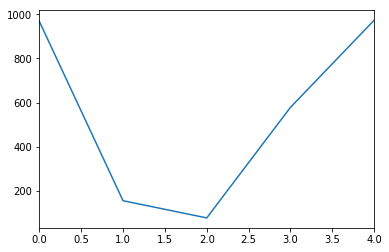

In [21]:
df['Births'].plot()
plt.show()

따라서 `Births` 열을 얻고자 하면 아래와 같이 명령하면 된다.

In [22]:
df['Births']

0    968
1    155
2     77
3    578
4    973
Name: Births, dtype: int64

이제 앞서 최대 출생수를 확인했던 `df['Births'].max()`를 활용하여
최대 출생수가 사용된 모든 행을 확인할 수 있다.
다음과 같이 하면 된다.

In [23]:
df['Names'][df['Births'] == df['Births'].max()]

4    Mel
Name: Names, dtype: object

위 결과에 의하면 4번 색인 행, 즉, 다섯 번째 줄에서만 앞서 확인한 최대 출생수 973명이 사용되었다.
즉, `Mel` 이름 단독으로 가장 많이 출생아이들의 이름으로 사용되었다.

아래와 같이 명령해도 동일한 결과를 얻는다.

* 내림 차순으로 정렬한 후에 위로부터 1개의 행만 보이라는 명령이다.

In [24]:
Sorted['Names'].head(1)

4    Mel
Name: Names, dtype: object

시각화 그래프에 좀 더 다양한 정보를 제공할 수 도 있다.
아래 프로그램은 그래프에 다양한 텍스트 정보를 입력하는 방법을 보여주는 예제이다.

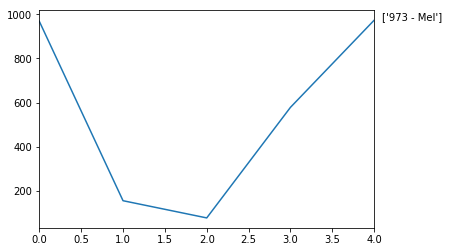

In [25]:
# 그래프 만들기
df['Births'].plot()

# 데이터셋에 있는 최댓값
MaxValue = df['Births'].max()

# 최댓값을 가진 이름 확인
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# 그래프 위에 보여줄 텍스트
Text = str(MaxValue) + " - " + MaxName

# 그래프에 텍스트 추가하기
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.show()